In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv('https://raw.githubusercontent.com/anvarnarz/praktikum_datasets/main/housing_LR.csv', index_col=0)
df.head(10)

,district,rooms,size,level,max_levels,price
0,Юнусабадский,3,57.0,4,4,52000.0
1,Яккасарайский,2,52.0,4,5,56000.0
2,Чиланзарский,2,42.0,4,4,37000.0
3,Чиланзарский,3,65.0,1,4,49500.0
4,Чиланзарский,3,70.0,3,5,55000.0
5,Чиланзарский,1,28.0,1,4,25500.0
6,Чиланзарский,1,30.0,2,4,21200.0
7,Яккасарайский,2,32.0,5,5,20000.0
8,Учтепинский,2,51.0,3,4,26200.0
9,Чиланзарский,1,30.0,1,4,22200.0


In [2]:
df['district'].value_counts()

district
Чиланзарский         1616
Мирзо-Улугбекский    1342
Учтепинский           872
Юнусабадский          847
Мирабадский           717
Яккасарайский         628
Яшнободский           456
Шайхантахурский       356
Олмазорский           262
Сергелийский          159
Янгихаётский           15
Бектемирский            8
Name: count, dtype: int64

In [3]:
df.corr(numeric_only=True)

,rooms,size,level,max_levels,price
rooms,1.000000,0.813730,0.148971,0.178550,0.609123
size,0.813730,1.000000,0.196587,0.307920,0.794788
level,0.148971,0.196587,1.000000,0.594496,0.079509
max_levels,0.178550,0.307920,0.594496,1.000000,0.254600
price,0.609123,0.794788,0.079509,0.254600,1.000000


In [4]:
housing = df[df.district == 'Чиланзарский']
housing.head()

,district,rooms,size,level,max_levels,price
2,Чиланзарский,2,42.0,4,4,37000.0
3,Чиланзарский,3,65.0,1,4,49500.0
4,Чиланзарский,3,70.0,3,5,55000.0
5,Чиланзарский,1,28.0,1,4,25500.0
6,Чиланзарский,1,30.0,2,4,21200.0


In [5]:
housing.shape

(1616, 6)

In [6]:
from sklearn.model_selection import train_test_split
train_set,test_set = train_test_split(housing,test_size=0.2,random_state=42)

In [7]:
from sklearn import linear_model
LR_model = linear_model.LinearRegression()

x_train = np.asanyarray(train_set[['size']])
y_train = np.asanyarray(train_set[['price']])

# Modelni tarbiyalaymiz (train)

LR_model.fit(x_train,y_train)

theta1 = LR_model.coef_[0][0]
theta0 = LR_model.intercept_[0]

print(f"{theta0 = }")
print(f"{theta1 = }")


theta0 = np.float64(-1009.2734590636028)
theta1 = np.float64(753.8444656913779)


In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

Text(0, 0.5, 'Price')

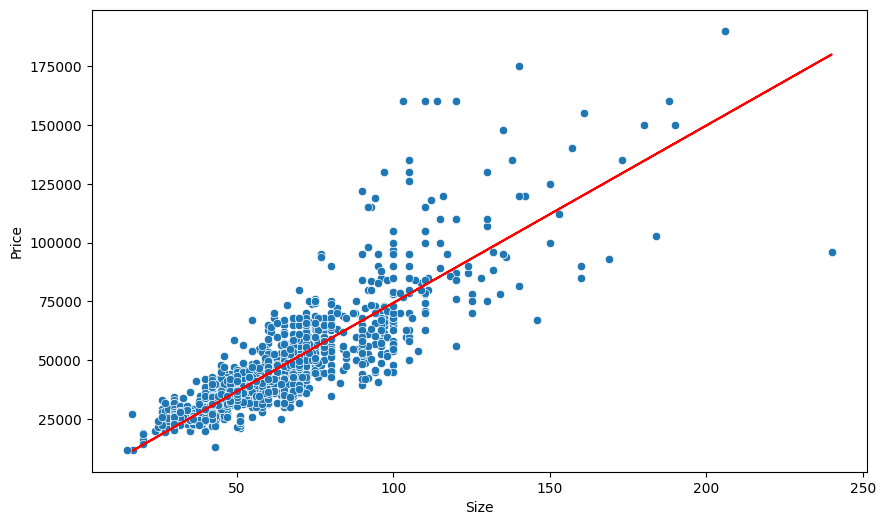

In [9]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=housing, x='size', y='price')
plt.plot(x_train, theta1*x_train + theta0, '-r')
plt.xlabel("Size")
plt.ylabel("Price")

In [10]:
x_test = np.asanyarray(test_set[['size']])
y_test = np.asanyarray(test_set[['price']])

y_predict = LR_model.predict(x_test)

In [11]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

MAE = mean_absolute_error(y_test,y_predict)
RMSE =  np.sqrt(mean_squared_error(y_test,y_predict))


print(f"{MAE = }")
print(f"{RMSE = }")

MAE = 7796.767463621409
RMSE = np.float64(12812.549962713074)


In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
df = pd.read_csv('https://raw.githubusercontent.com/anvarnarz/praktikum_datasets/main/reklama_sales.csv')
df.head(5)

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [14]:
df.corr(numeric_only=True)

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


In [15]:
X = np.asanyarray(df[['TV']])
Y = np.asanyarray(df[['Sales']])

In [16]:
from sklearn.model_selection import train_test_split
train_set,test_set = train_test_split(X,Y,test_size=0.2,random_state=42)

ValueError: too many values to unpack (expected 2)